# Time Series imports in Python example

We can mock up the result of a query on the TimeSeries API, and save this result to a local .json file.  

The layout of this example JSON is as follows:

In [9]:
{
	"modelName": "Some.Model.FQN",
	"calibrationType": "Market Consistent",
	"start_date": "2013-01-31",
	"end_date": "2013-03-31",
	"economy": "AUD",
	"equityAsset": "E_Somthing",
	"rates": [{
			"Date": "2013-01-31",
			"value": "100.00"
		},
		{
			"Date": "2013-02-28",
			"value": "105.00"
		},
		{
			"Date": "2013-03-31",
			"value": "110.00"
		}
	]
}

{'calibrationType': 'Market Consistent',
 'economy': 'AUD',
 'end_date': '2013-03-31',
 'equityAsset': 'E_Somthing',
 'modelName': 'Some.Model.FQN',
 'rates': [{'Date': '2013-01-31', 'value': '100.00'},
  {'Date': '2013-02-28', 'value': '105.00'},
  {'Date': '2013-03-31', 'value': '110.00'}],
 'start_date': '2013-01-31'}

We can import this raw file into a Pandas dataframe

In [5]:
import pandas as pd

filepath  = 'C:\\Users\\stewarca\\data\\'
ExFile = 'our-time-series.json'


TS = pd.read_json(filepath + ExFile, convert_dates = ['end_date','start_date'])
TS.head()


,calibrationType,economy,end_date,equityAsset,modelName,rates,start_date
0,Market Consistent,AUD,2013-03-31,E_Somthing,Some.Model.FQN,"{'Date': '2013-01-31', 'value': '100.00'}",2013-01-31
1,Market Consistent,AUD,2013-03-31,E_Somthing,Some.Model.FQN,"{'Date': '2013-02-28', 'value': '105.00'}",2013-01-31
2,Market Consistent,AUD,2013-03-31,E_Somthing,Some.Model.FQN,"{'Date': '2013-03-31', 'value': '110.00'}",2013-01-31


We will need one further step to convert the inner results of the "rates" column into JSON, and then convert that to a new dataframe. 

We can then index this by the "Date" to create a true time series.

In [6]:
rates = pd.read_json(TS['rates'].to_json(), orient='index')
rates.set_index('Date',inplace = True)
rates.head()

,value
Date,
2013-01-31,100
2013-02-28,105
2013-03-31,110


Taking the "rates['value']" as a Series, we can then plot this.

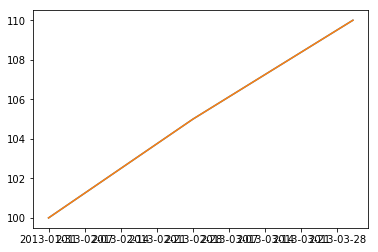

In [8]:
import matplotlib.pyplot as plt
plt.plot(rates['value'])
plt.show()